In [1]:
# Dependencies and Setup
import pandas as pd
#add in case required()
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime
import os
import gmaps

# File to Load (Remember to Change These)
#file_to_load = "yelp_data.csv"
# Read Purchasing File and store into Pandas data frame
#yelp_data = pd.read_csv(file_to_load)
#yelp_data.head()

yelp_data = pd.read_excel (r'yelp.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'
yelp_data.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,...,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,NaN,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,...,9:0-0:0,9:0-0:0,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",NaN,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,...,NaN,17:30-21:30,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,8:0-17:0,1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7:0-23:0,7:0-23:0,1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [2]:
yelp_data.columns

Index(['address', 'attributes', 'attributes.AcceptsInsurance',
       'attributes.AgesAllowed', 'attributes.Alcohol', 'attributes.Ambience',
       'attributes.BYOB', 'attributes.BYOBCorkage', 'attributes.BestNights',
       'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
       'attributes.ByAppointmentOnly', 'attributes.Caters',
       'attributes.CoatCheck', 'attributes.Corkage',
       'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForDancing',
       'attributes.GoodForKids', 'attributes.GoodForMeal',
       'attributes.HairSpecializesIn', 'attributes.HappyHour',
       'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel',
       'attributes.Open24Hours', 'attributes.OutdoorSeating',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
       'attributes.RestaurantsDelivery', 'attributes.Restau

In [3]:
#Categories
category = yelp_data['categories'].unique()
category

array(['Golf, Active Life',
       'Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood',
       'Sushi Bars, Restaurants, Japanese', ...,
       'Golf, Hotels, Day Spas, Hotels & Travel, Event Planning & Services, Beauty & Spas, Active Life, Venues & Event Spaces, Resorts',
       'Water Purification Services, Water Heater Installation/Repair, Home Services, Plumbing',
       'Home Services, Contractors, Landscaping, Masonry/Concrete, Landscape Architects'],
      dtype=object)

In [4]:
#Stars by State
starsGroup = yelp_data.groupby(['state'])['stars'].mean()
starsGroup = pd.DataFrame(starsGroup).reset_index()
starsGroup.head()

,state,stars
0,AB,3.385359
1,AK,2.750000
2,AL,3.833333
3,AR,2.000000
4,AZ,3.707185


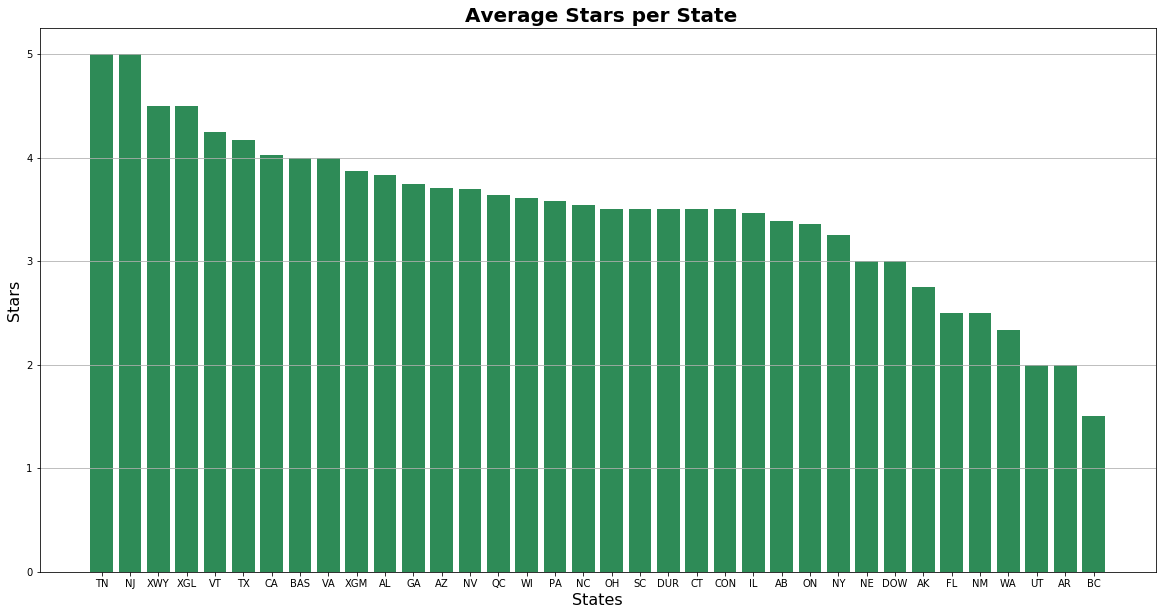

In [5]:
#get data
#Stars by State Bar Graph

#starsGroup = yelp_data.groupby("state")[category].sum().reset_index()
starsGroup = starsGroup.sort_values("stars", ascending=False).reset_index(drop=True)

#plot
%matplotlib inline

plt.figure(figsize=(20,10))

plt.bar(starsGroup.state, starsGroup["stars"], color="seagreen")


plt.title(" Average Stars per State", weight="bold", fontsize=20)
plt.xlabel("States", fontsize=16)
plt.ylabel("Stars", fontsize=16)

plt.grid(axis='y')

plt.savefig("StarsByState.png")

plt.show()

In [6]:
yelp_data[yelp_data['city']=='110 Las Vegas'].mean()

attributes             NaN
hours                  NaN
is_open           0.000000
latitude         36.099575
longitude      -115.306722
review_count     68.000000
stars             5.000000
dtype: float64

In [7]:
#Stars by City
stars_city = yelp_data.groupby(['city'])['stars'].mean()
stars_city = pd.DataFrame(stars_city).reset_index()
stars_city

,city,stars
0,110 Las Vegas,5.000000
1,AGINCOURT,2.000000
2,AVON,5.000000
3,AZ,3.500000
4,Agincourt,2.500000
5,Ahwahtukee,5.000000
6,Ahwatukee,3.789474
7,Ahwatukee Foothills Village,5.000000
8,Airdrie,3.199405
9,Ajax,3.277228


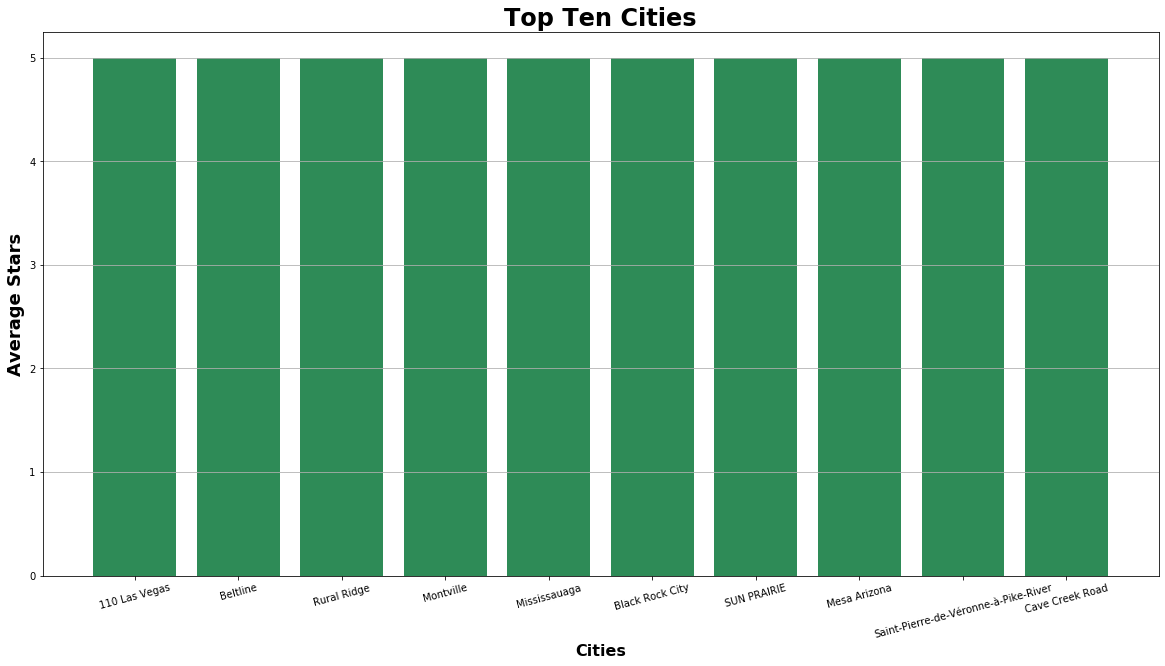

In [8]:
#get data
#Stars by City Bar Graph

#stars_city = yelp_data.groupby("city")[category].sum().reset_index()
stars_city = stars_city.sort_values("stars", ascending=False)[:10].reset_index(drop=True)

#plot
%matplotlib inline

plt.figure(figsize=(20,10))
plt.bar(stars_city.city, stars_city["stars"], color="seagreen")
plt.xticks(rotation=15)


plt.title("Top Ten Cities", weight="bold", fontsize=24)
plt.xlabel("Cities", weight="bold", fontsize=16)
plt.ylabel("Average Stars", weight="bold", fontsize=18)

plt.grid(axis='y')
plt.savefig("StarsByCity.png")

plt.show()